# **Exercise 1**

# Intro to pandas

**Learning Objectives:**
  * Gain an introduction to the `DataFrame` and `Series` data structures of the *pandas* library
  * Access and manipulate data within a `DataFrame` and `Series`
  * Import CSV data into a *pandas* `DataFrame`
  * Reindex a `DataFrame` to shuffle data

[*pandas*](http://pandas.pydata.org/) is a column-oriented data analysis API. It's a great tool for handling and analyzing input data, and many ML frameworks support *pandas* data structures as inputs.
Although a comprehensive introduction to the *pandas* API would span many pages, the core concepts are fairly straightforward, and we'll present them below. For a more complete reference, the [*pandas* docs site](http://pandas.pydata.org/pandas-docs/stable/index.html) contains extensive documentation and many tutorials.

## Basic Concepts

The following line imports the *pandas* API and prints the API version:

In [1]:
from __future__ import print_function

import pandas as pd
pd.__version__

'1.1.5'

The primary data structures in *pandas* are implemented as two classes:

  * **`DataFrame`**, which you can imagine as a relational data table, with rows and named columns.
  * **`Series`**, which is a single column. A `DataFrame` contains one or more `Series` and a name for each `Series`.

The data frame is a commonly used abstraction for data manipulation. Similar implementations exist in [Spark](https://spark.apache.org/) and [R](https://www.r-project.org/about.html).

One way to create a `Series` is to construct a `Series` object. For example:

In [2]:
pd.Series(['San Francisco', 'San Jose', 'Sacramento'])

0    San Francisco
1         San Jose
2       Sacramento
dtype: object

`DataFrame` objects can be created by passing a `dict` mapping `string` column names to their respective `Series`. If the `Series` don't match in length, missing values are filled with special [NA/NaN](http://pandas.pydata.org/pandas-docs/stable/missing_data.html) values. Example:

In [3]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

pd.DataFrame({ 'City name': city_names, 'Population': population })

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


But most of the time, you load an entire file into a `DataFrame`. The following example loads a file with California housing data. Run the following cell to load the data and create feature definitions:

In [4]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The example above used `DataFrame.describe` to show interesting statistics about a `DataFrame`. Another useful function is `DataFrame.head`, which displays the first few records of a `DataFrame`:

In [5]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Another powerful feature of *pandas* is graphing. For example, `DataFrame.hist` lets you quickly study the distribution of values in a column:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f1024d2d0>]],
      dtype=object)

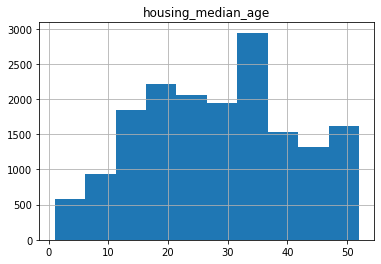

In [6]:
california_housing_dataframe.hist('housing_median_age')

## Accessing Data

You can access `DataFrame` data using familiar Python dict/list operations:

In [7]:
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })
print(type(cities['City name']))
cities['City name']

<class 'pandas.core.series.Series'>


0    San Francisco
1         San Jose
2       Sacramento
Name: City name, dtype: object

In [8]:
print(type(cities['City name'][1]))
cities['City name'][1]

<class 'str'>


'San Jose'

In [9]:
print(type(cities[0:2]))
cities[0:2]

<class 'pandas.core.frame.DataFrame'>


,City name,Population
0,San Francisco,852469
1,San Jose,1015785


In addition, *pandas* provides an extremely rich API for advanced [indexing and selection](http://pandas.pydata.org/pandas-docs/stable/indexing.html) that is too extensive to be covered here.

## Manipulating Data

You may apply Python's basic arithmetic operations to `Series`. For example:

In [10]:
population / 1000.

0     852.469
1    1015.785
2     485.199
dtype: float64

[NumPy](http://www.numpy.org/) is a popular toolkit for scientific computing. *pandas* `Series` can be used as arguments to most NumPy functions:

In [11]:
import numpy as np

np.log(population)

0    13.655892
1    13.831172
2    13.092314
dtype: float64

For more complex single-column transformations, you can use `Series.apply`. Like the Python [map function](https://docs.python.org/2/library/functions.html#map), 
`Series.apply` accepts as an argument a [lambda function](https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions), which is applied to each value.

The example below creates a new `Series` that indicates whether `population` is over one million:

In [12]:
population.apply(lambda val: val > 1000000)

0    False
1     True
2    False
dtype: bool


Modifying `DataFrames` is also straightforward. For example, the following code adds two `Series` to an existing `DataFrame`:

In [13]:
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
cities

,City name,Population,Area square miles,Population density
0,San Francisco,852469,46.87,18187.945381
1,San Jose,1015785,176.53,5754.177760
2,Sacramento,485199,97.92,4955.055147


# Exercise #1

Modify the `cities` table by adding a new boolean column that is True if and only if *both* of the following are True:

  * The city is named after a saint.
  * The city has an area greater than 50 square miles.

**Note:** Boolean `Series` are combined using the bitwise, rather than the traditional boolean, operators. For example, when performing *logical and*, use `&` instead of `and`.

**Hint:** "San" in Spanish means "saint."

In [14]:
# Your code here
cities['Is wide and has saint name'] = (cities['City name'].str.contains("San")) & (cities['Area square miles'] > 50)
print(cities)

       City name  Population  ...  Population density  Is wide and has saint name
0  San Francisco      852469  ...        18187.945381                       False
1       San Jose     1015785  ...         5754.177760                        True
2     Sacramento      485199  ...         4955.055147                       False

[3 rows x 5 columns]


## Indexes
Both `Series` and `DataFrame` objects also define an `index` property that assigns an identifier value to each `Series` item or `DataFrame` row. 

By default, at construction, *pandas* assigns index values that reflect the ordering of the source data. Once created, the index values are stable; that is, they do not change when data is reordered.

In [15]:
city_names.index

RangeIndex(start=0, stop=3, step=1)

In [16]:
cities.index

RangeIndex(start=0, stop=3, step=1)

Call `DataFrame.reindex` to manually reorder the rows. For example, the following has the same effect as sorting by city name:

In [17]:
cities.reindex([2, 0, 1])

,City name,Population,Area square miles,Population density,Is wide and has saint name
2,Sacramento,485199,97.92,4955.055147,False
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True


Reindexing is a great way to shuffle (randomize) a `DataFrame`. In the example below, we take the index, which is array-like, and pass it to NumPy's `random.permutation` function, which shuffles its values in place. Calling `reindex` with this shuffled array causes the `DataFrame` rows to be shuffled in the same way.
Try running the following cell multiple times!

In [18]:
cities.reindex(np.random.permutation(cities.index))

,City name,Population,Area square miles,Population density,Is wide and has saint name
1,San Jose,1015785,176.53,5754.177760,True
0,San Francisco,852469,46.87,18187.945381,False
2,Sacramento,485199,97.92,4955.055147,False


For more information, see the [Index documentation](http://pandas.pydata.org/pandas-docs/stable/indexing.html#index-objects).

# **Excercise 2**

In [19]:
# from __future__ import print_function
import pandas as pd

Document 1

In [20]:
term1 = pd.Series(['this', 'is', 'a', 'sample'])
term_count1 = pd.Series([1,1,2,1])
d1 = pd.DataFrame({ 'Term': term1, 'Term Count': term_count1 })

d1

,Term,Term Count
0,this,1
1,is,1
2,a,2
3,sample,1


Document 2

In [21]:
term2 = pd.Series(['this', 'is', 'another', 'example'])
term_count2 = pd.Series([1,1,2,3])
d2 = pd.DataFrame({ 'Term': term2, 'Term Count': term_count2 })

d2

,Term,Term Count
0,this,1
1,is,1
2,another,2
3,example,3


TF-IDF Calculation

In [22]:
import math

def tf(w,d):
  idx = d['Term'].tolist().index(w)
  term_count = d['Term Count'][idx]

  # Get the count of the most comment term in the document
  max = d['Term Count'].max()

  return term_count / max

def idf(w,d):
  total_doc = 2
  if ((d1["Term"] == w).any() and (d2["Term"] == w).any()):
    idf = math.log10(total_doc/2)
  else:
    idf = math.log10(total_doc/1)
  return idf

def tfidf(w,d):
  TF = tf(w,d)
  IDF = idf(w,d)
  return TF*IDF

# Command to get individual TF-IDF
# tfidf('sample', d1)

# Document 1
d1_words = pd.Series(['this', 'is', 'a', 'sample'])
d1_tfidf_indiv = pd.Series([tfidf('this', d1),tfidf('is', d1),tfidf('a', d1),tfidf('sample', d1)])
# Document 2
d2_words = pd.Series(['this', 'is', 'another', 'example'])
d2_tfidf_indiv = pd.Series([tfidf('this', d2),tfidf('is', d2),tfidf('another', d2),tfidf('example', d2)])

TFIDF = pd.DataFrame({ 'Document 1 Terms': d1_words, 'Document 1 TF-IDF': d1_tfidf_indiv, 'Document 2 Terms': d2_words, 'Document 2 TF-IDF': d2_tfidf_indiv })

TFIDF

,Document 1 Terms,Document 1 TF-IDF,Document 2 Terms,Document 2 TF-IDF
0,this,0.000000,this,0.000000
1,is,0.000000,is,0.000000
2,a,0.301030,another,0.200687
3,sample,0.150515,example,0.301030


# **Excercise 3**

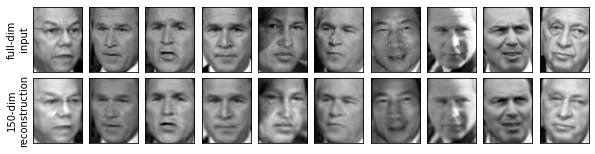

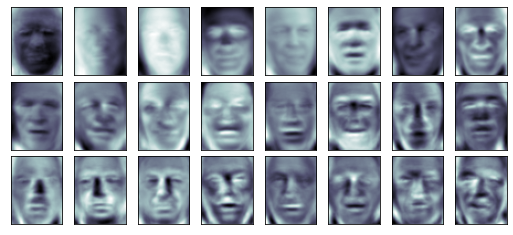

In [24]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA


faces = fetch_lfw_people(min_faces_per_person=60)

pca = PCA(200).fit(faces.data) # Change the number of principal components to 200, 250 and 500. 
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

plt.show()


fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

plt.show()

**Question 1: Change the number of principal components to 200, 250 and 500. Explain the changes you observe in the reconstructed output.**

**Answer:** As the number of principal components increases, the reconstructed output image quality increases. The larger the number of principal components given, we are essentially giving more information, hence the increase in image quality.


**Question 2: Read the PCA class/function in sklearn and tell the TAs the methods sklearn uses to find the eigenvectors and eigenvalues.**

**Answer:** The PCA function in sklearn uses linear dimensionality reduction using Singular Value Decomposition (SVD) to obtain the eigenvectors and eigen values.


**Question 3:** Fill in the blank: in PCA, given data matrix X of shape nxd where n is the number of data points and d is the dimension of the data, we calculate eigenvectors and eigenvalues of M which is **covariance matrix** of X.

**Question 4: X is the input matrix with shape nxd where n is the number of data points and d is the dimension of the data. Lets assume Cov(X) = ATA and A = f(X). Find the function f to apply on X that gives you A. Cov(X) is the covariance matrix of X.**

**Answer:** The function f to apply on X that gives you A is X-E[X].

**Question 5: Why do we sort eigenvalues and select eigenvectors in the decreasing order of eigenvalues.**

**Answer:** Eigenvalues represent the variance of the data. If we sort and select eigen vectors in the decreasing order of eigenvalues, we would be able to obtain the eigenvector that has the largest spread among the data first. Getting the eigenvector with the larger spread means that we are getting more important information and can discard those with a smaller spread (variance).

# **Excercise 4**

**Assume we need to create a model that predicts the number of customers at a restaurant at any point of time. What kind of features should we extract?**

**Answer:** We would have to extract features such as time, location of the restaurant, number or reservations, any promotions and day of the week.


Citations: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html